# <h1><center>**`Employee Salaries Project`**</center></h1>

### **`Problem Statement`**


To predict the salary of employee based on the information provided in the dataset.

- ### `How will the company profit from this solution?`
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

- ### `How will the employee profit from this solution?`

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions
### `Dataset Desciption`

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the train_dataset, train_salaries, test_dataset
train_data = 
train_data_salaries = 
test_data = 

In [ ]:
# print head of train data



jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [ ]:
# print head of train data salaries


jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [ ]:
# print test head



jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [ ]:
# Adding salary data to train_dataset



# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [ ]:
# get all column names




Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train_dataset




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [ ]:
# Check which columns are having categorical, numerical or boolean values of test_dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  




yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

In [ ]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns



yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset using the len() function

In [ ]:
# len of train and test dataset




train data length:  1000000
test data length:  1000000


## Get unique values

In [ ]:
# get how many unique values are in train_dataset




jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 280


In [ ]:
# get how many unique values are in test_dataset




jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [ ]:
# Check for missing values in all the columnns of the train_dataset




jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
 # Check for missing values in all the columnns of the test_dataset




jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [ ]:
# drop jobId and companyId from train_dataset
train_data = 

train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[1000000 rows x 7 columns]

In [ ]:
# drop jobId and companyId from test_dataset
test_data = 
test_data

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [ ]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = 
var_list = 
# looping on whole dataset for geting list of categorical data column name





## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [ ]:
# Correlation metrix using pandas
corr =




## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

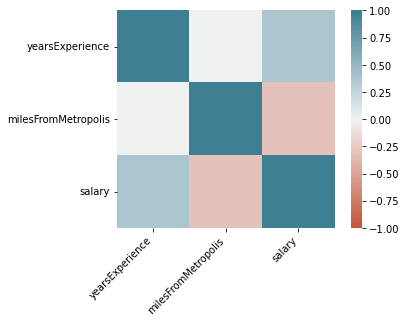

In [ ]:
# Correlation metrix using seaborn
ax = 







## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [ ]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = 
    
    #Observed Values
    observed_values = 
    
    #Expected Values
    b = 
    expected_values = 
    
    #Degree of Freedom
    no_of_rows = 
    no_of_columns = 
    degree_f=
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = 
    chi_square_statistic = 
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=
    print('critical_value:',critical_value)
    
    #p-value
    p_value =

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset







chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  50117.72406771936
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16703.025256041707
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  14.913329934821567
critical_value: 58.12403768086803
p-value: 0.9999643570205455
Retain H0,There is no relationship between 2 cate

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


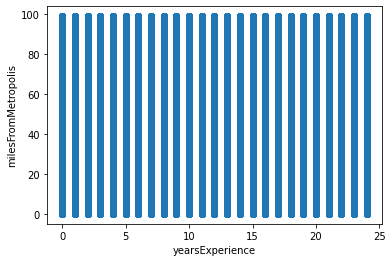

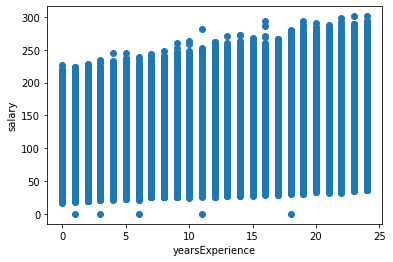

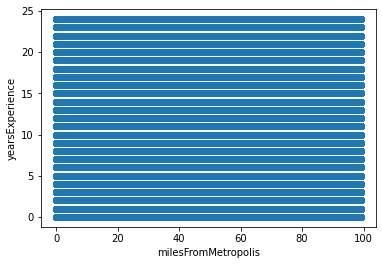

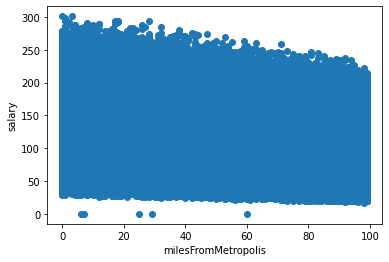

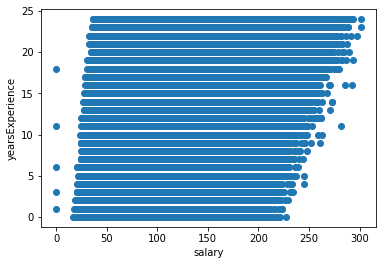

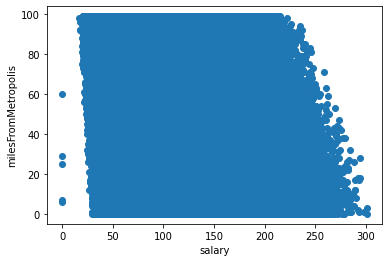

In [ ]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    # code below


# Loop through the different columns 







From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f455362b790>,
      dtype=object)

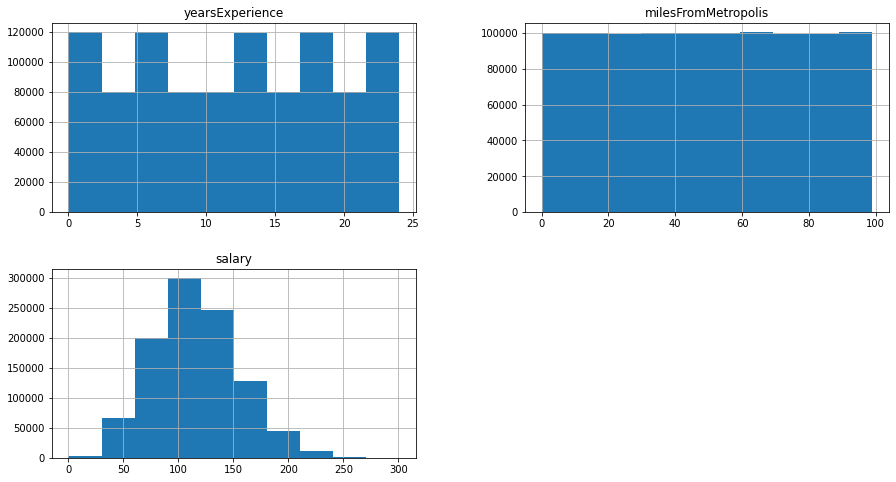

In [ ]:
# Histogram using pandas 






From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## groupby

You can use groupby to chunk up your data into subsets for further analysis.

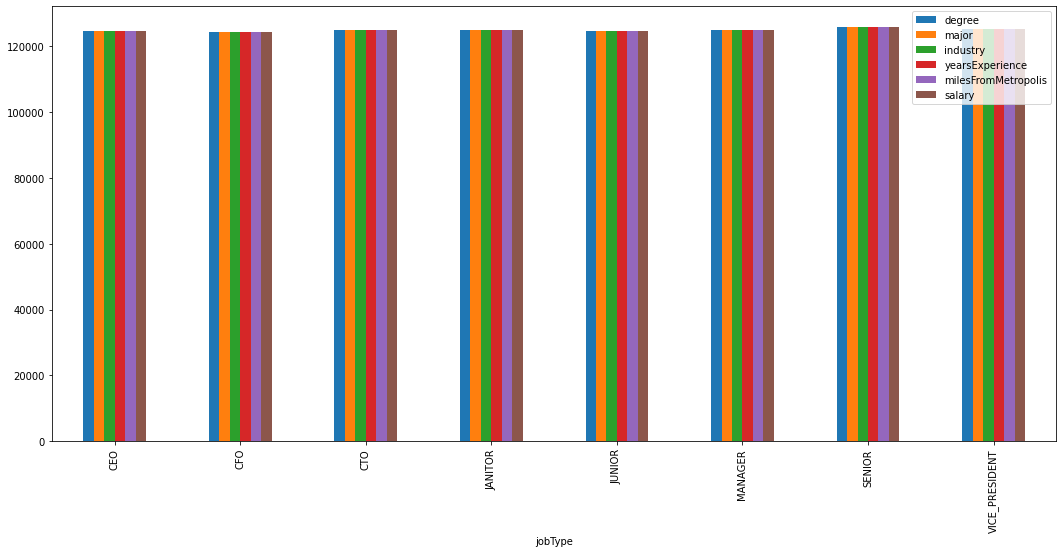

In [ ]:
# goup data by jobType and plot count plot







from above graph:
1. All data for each jobType is distributed equally.

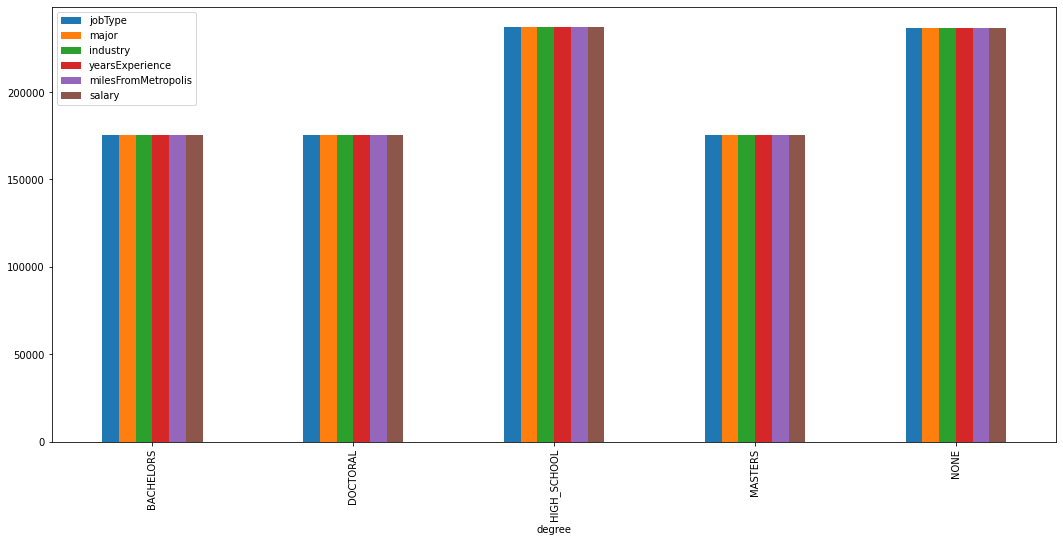

In [ ]:
# goup data by degree and plot count plot






From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

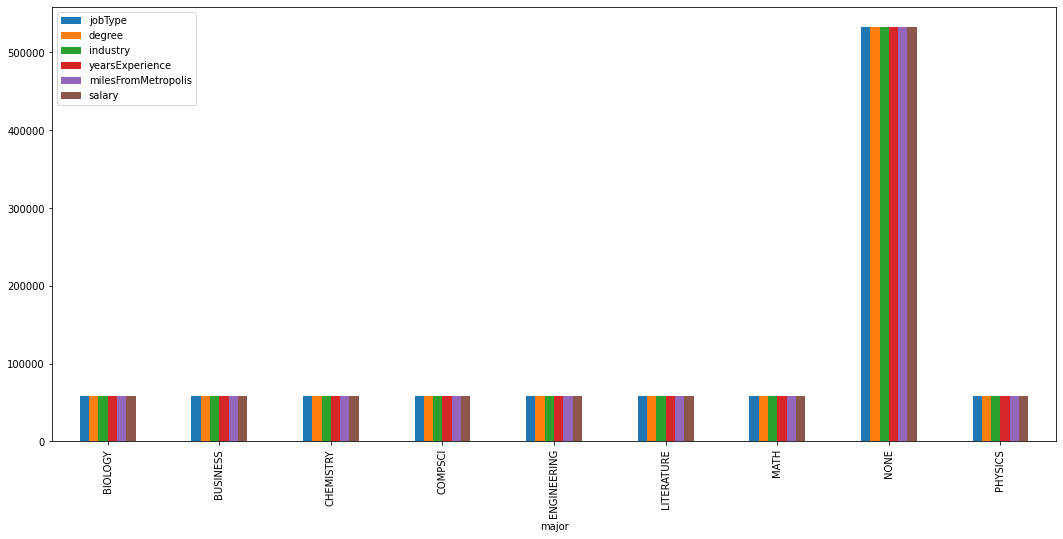

In [ ]:
# goup data by major and plot count plot






From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


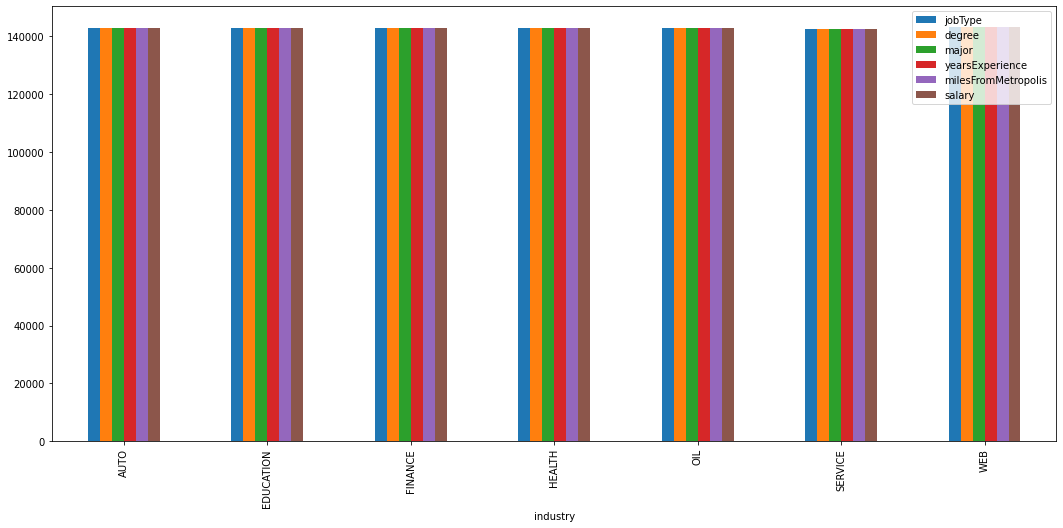

In [ ]:
# goup data by industry and plot count plot






from above graph:
1. All data for each industry is distributed equally.

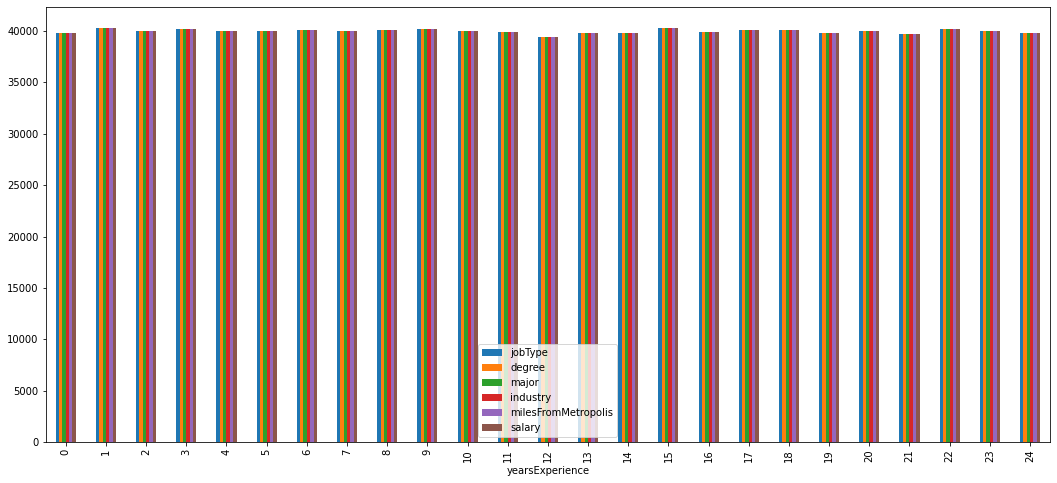

In [ ]:
# goup data by yearsExperience and plot count plot






from above graph:
1. All data for each yearsExperience is distributed almost equally.

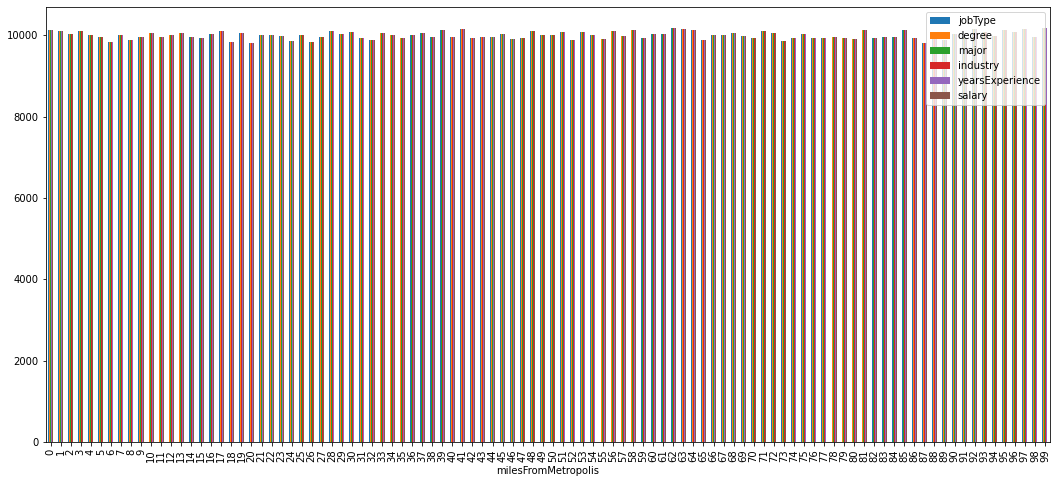

In [ ]:
# goup data by milesFromMetropolis and plot count plot





from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

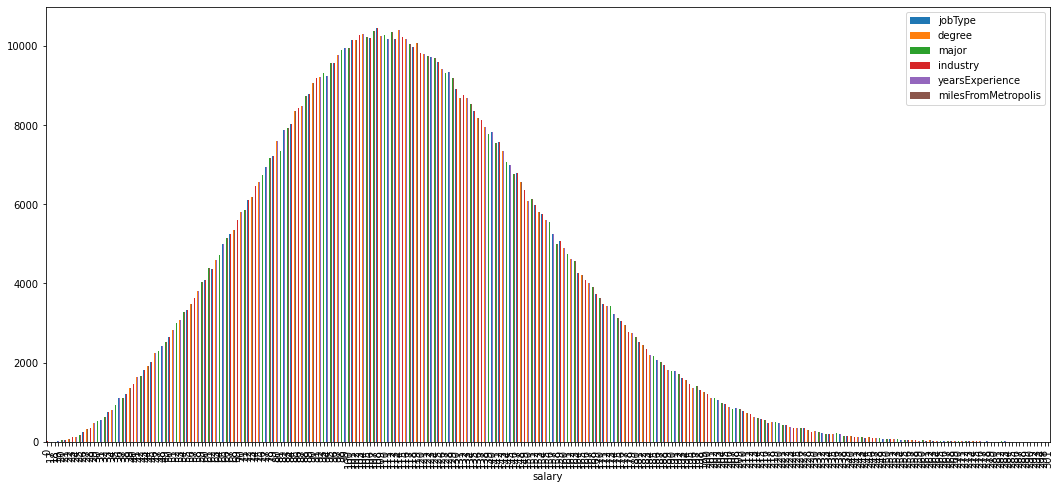

In [ ]:
# goup data by salary and plot count plot






from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


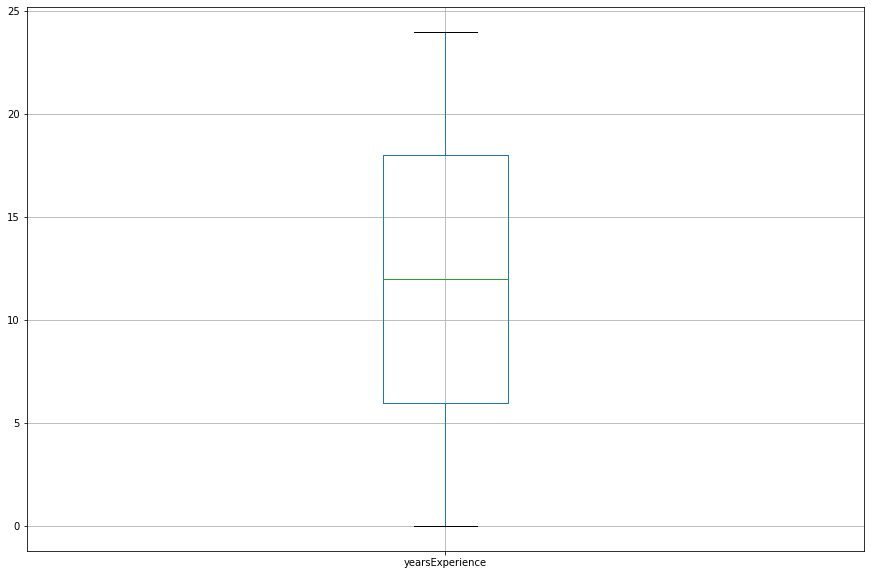

In [ ]:
# box plot using pandas 
# box plot for yearsExperience column






from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

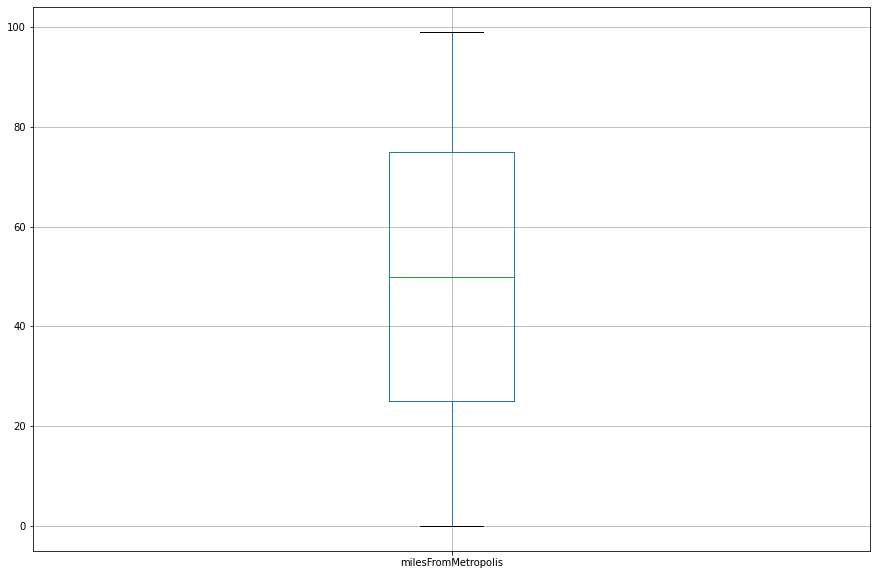

In [ ]:
# box plot using pandas 
# box plot for milesFromMetropolies column







from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

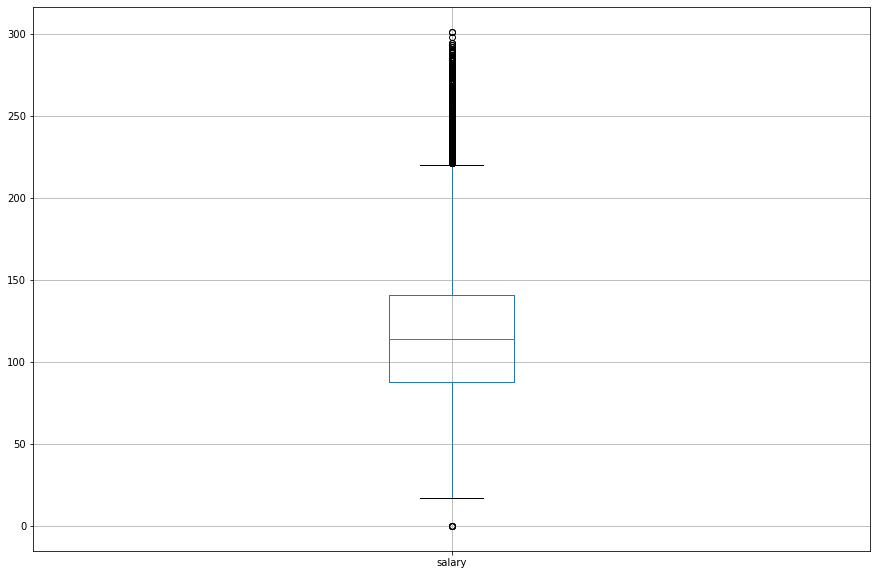

In [ ]:
# box plot using pandas 
# box plot for salary column
train_data.boxplot(column='salary', figsize=(15, 10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

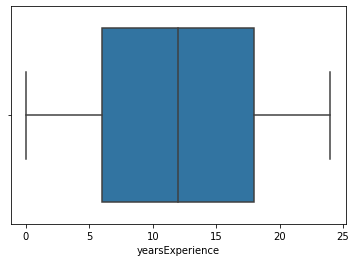

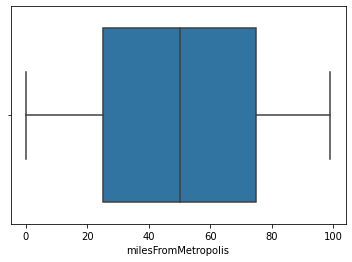

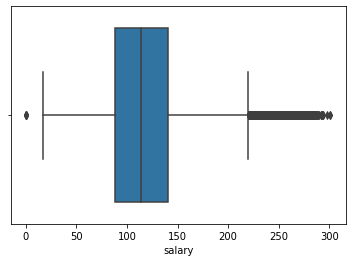

In [ ]:
# box plot using seaborn 
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column









## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

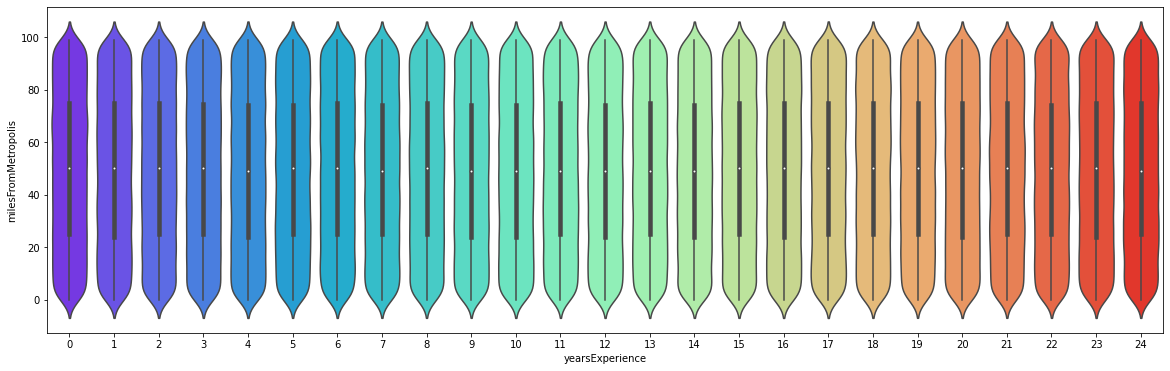

In [ ]:
# violin plot for yearsExperience and milesFromMetropolis columns





from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

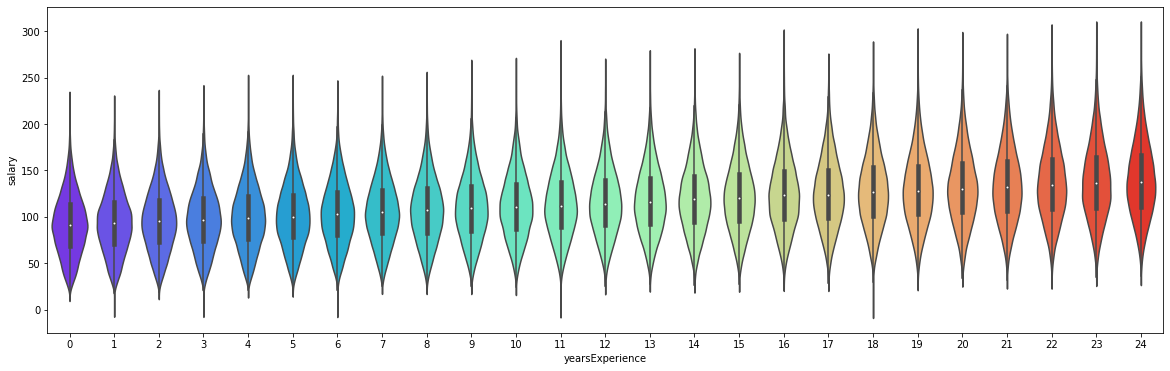

In [ ]:
# violin plot for yearsExperience and salary columns





from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

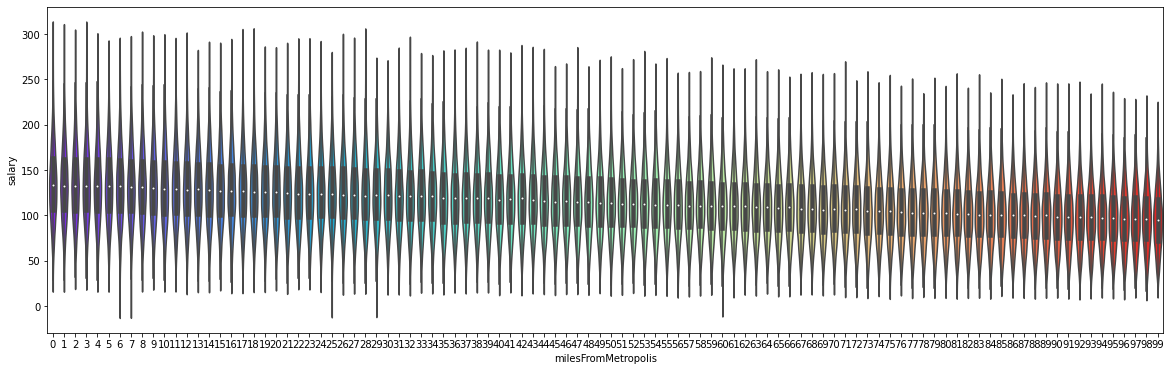

In [ ]:
# violin plot for milesFromMetropolis from salary columns






from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


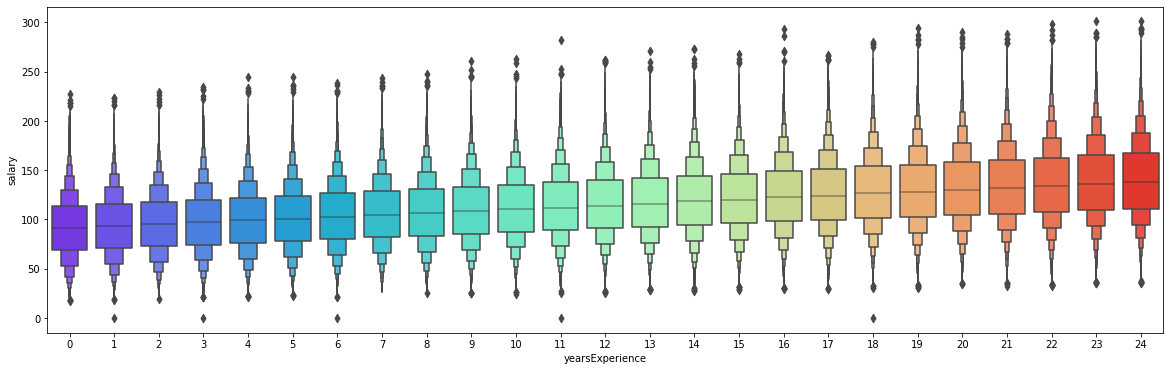

In [ ]:
# boxen plot for yearsExperience and salary columns





from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

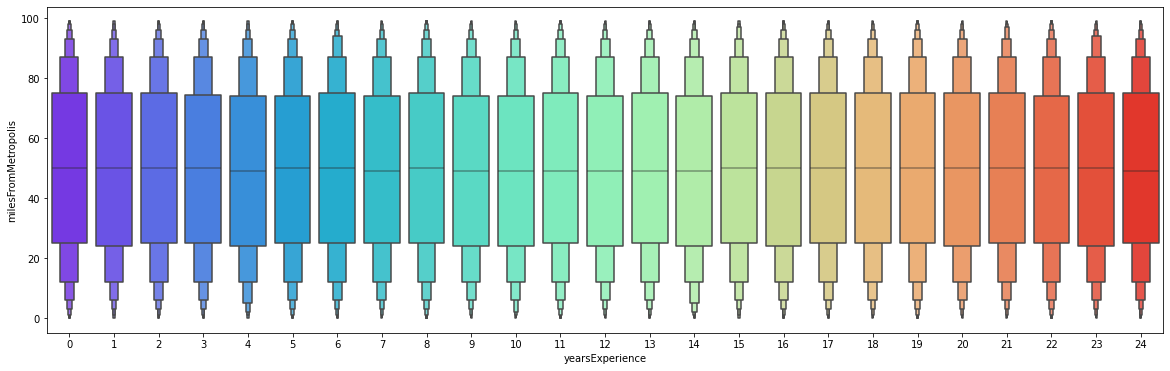

In [ ]:
# boxen plot for yearsExperience and milesFromMetropolis columns






from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

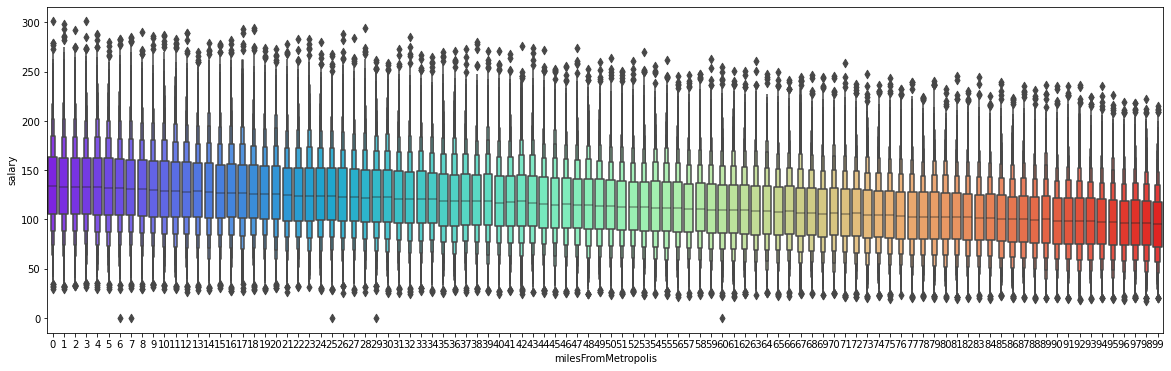

In [ ]:
# boxen plot for milesFromMetropolis from salary columns






from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

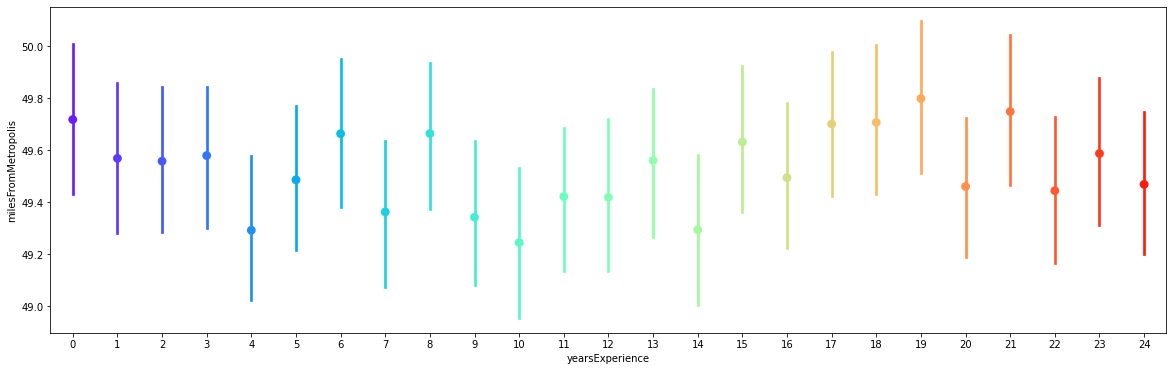

In [ ]:
# point plot for yearsExperience and milesFromMetropolis columns





From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

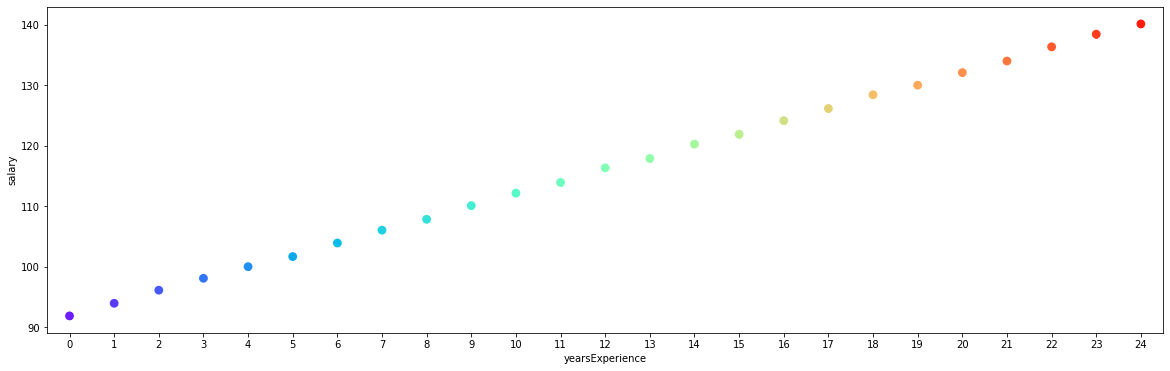

In [ ]:
# point plot for yearsExperience and salary columns






From above point plot

There is a increase in salary when there is a increase in yearsExperience

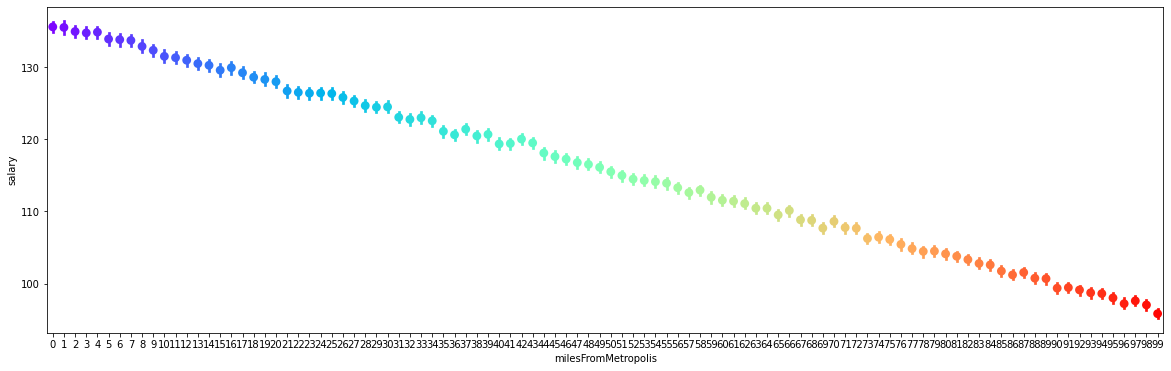

In [ ]:
# point plot for milesFromMetropolis from salary columns





From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


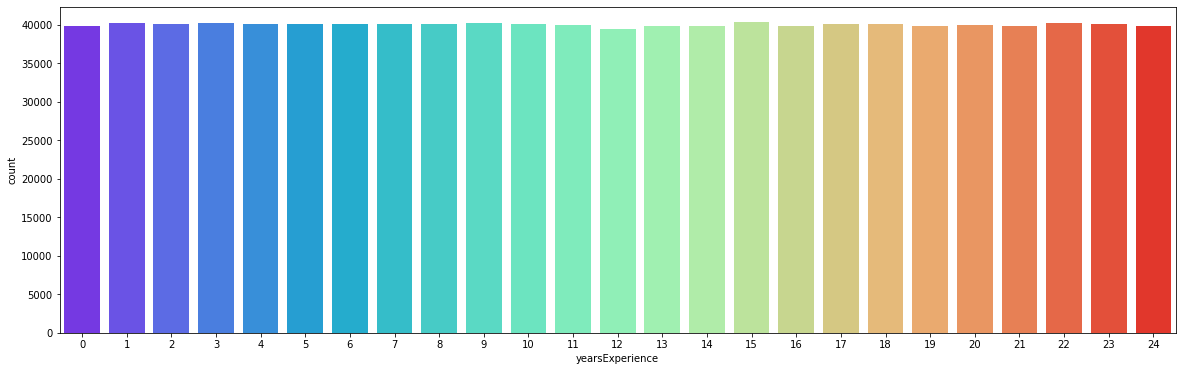

In [ ]:
# count plot of whole datset based on yearsExperience





From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

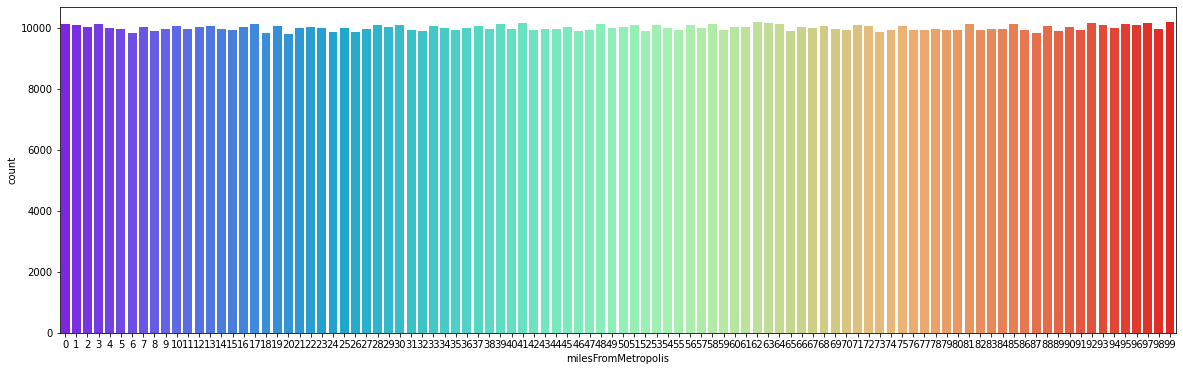

In [ ]:
# count plot of whole datset based on milesFromMetropolis





From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

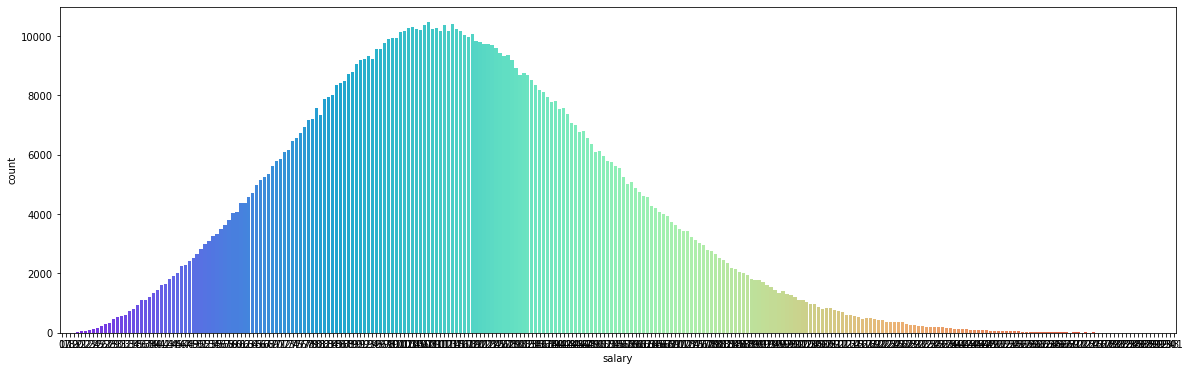

In [ ]:
# count plot of whole datset based on salary




From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

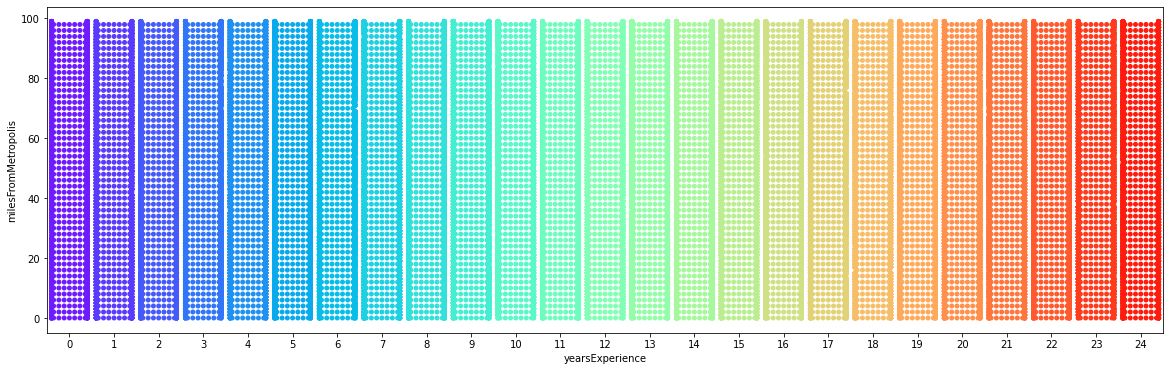

In [ ]:
# swarm plot for yearsExperience and milesFromMetropolis columnsplt.figure(figsize=(20,6)), data=train_data.iloc[1:50000]






From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

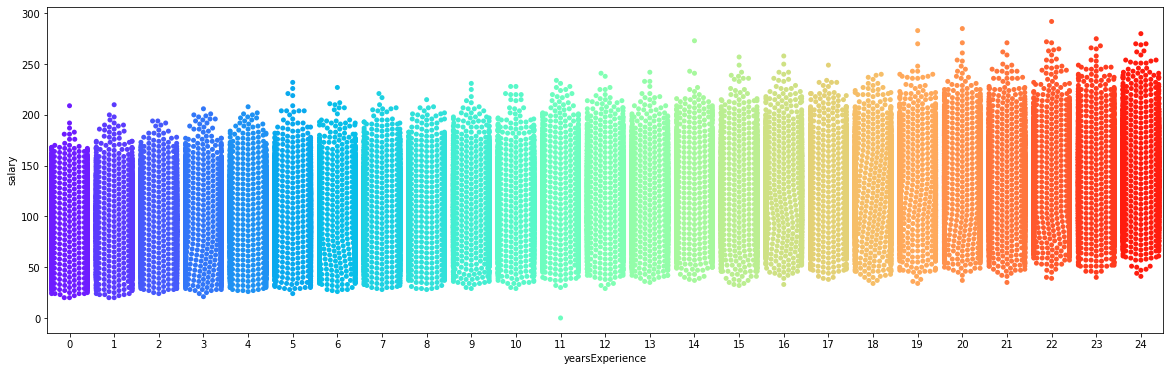

In [ ]:
# swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]





from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

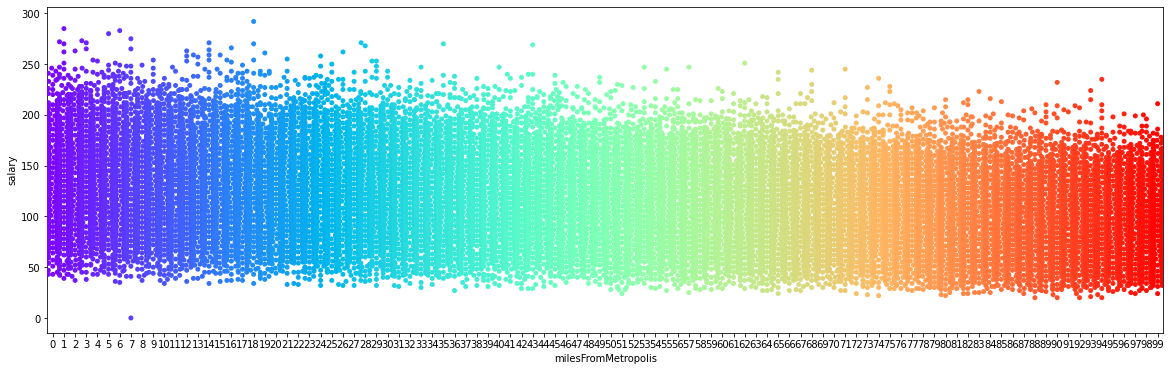

In [ ]:
# swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]




from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

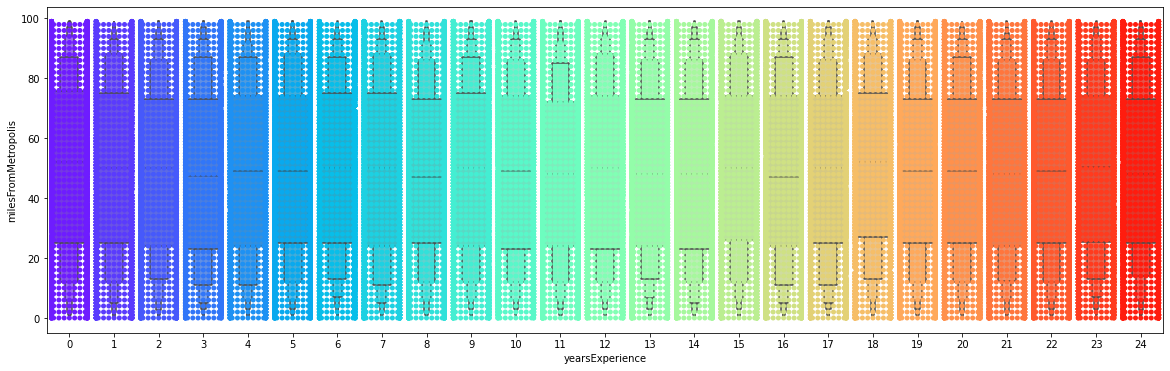

In [ ]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns, data=train_data.iloc[1:50000]






From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

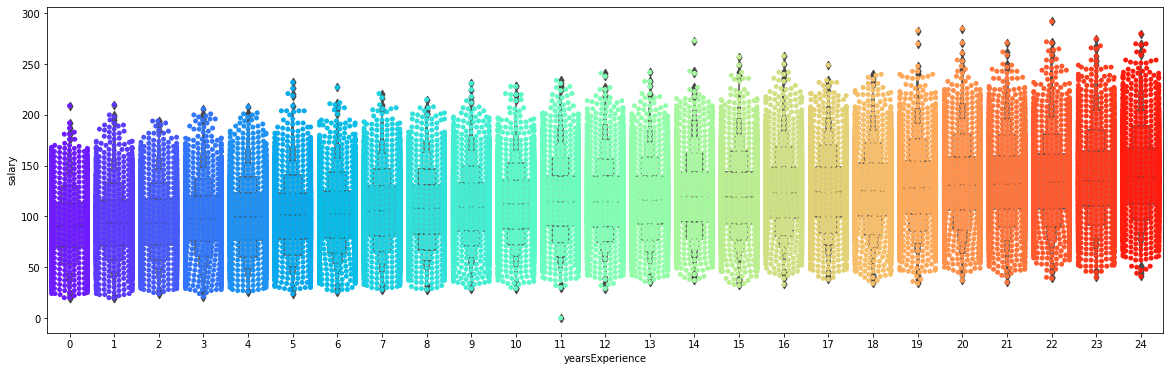

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]





from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

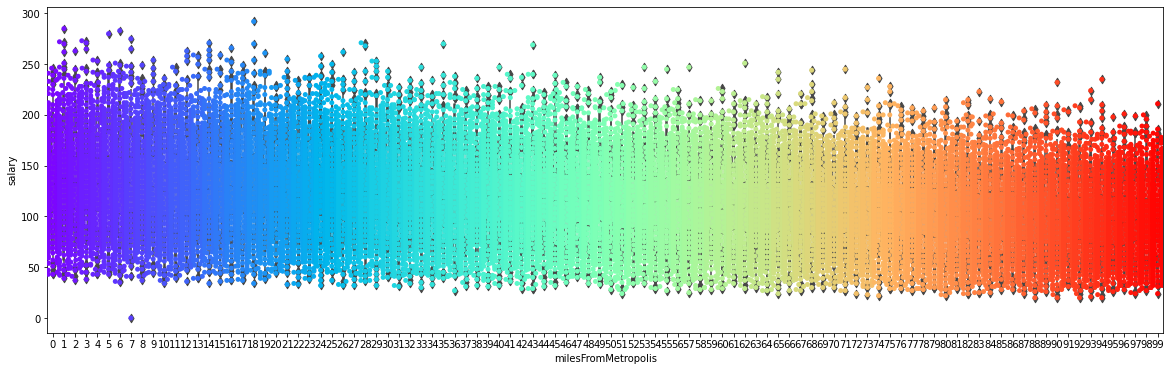

In [ ]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]





from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

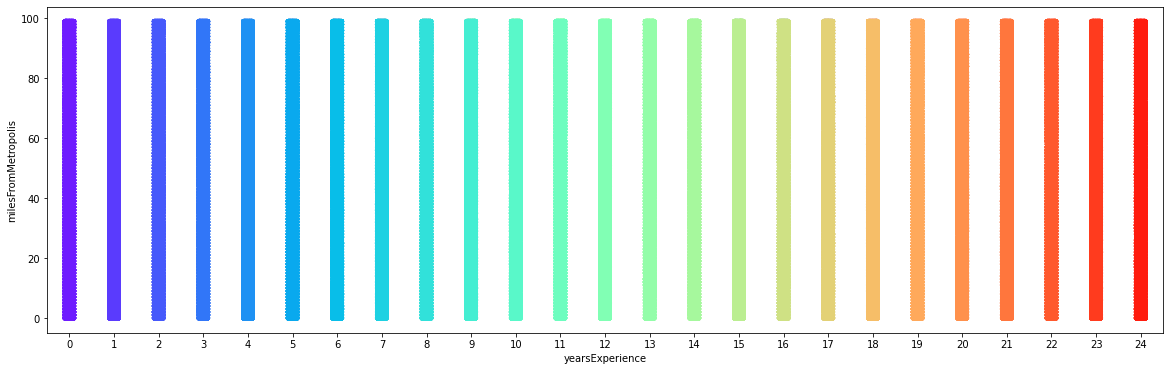

In [ ]:
# strip plot between yearsExperience and salary columns






from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

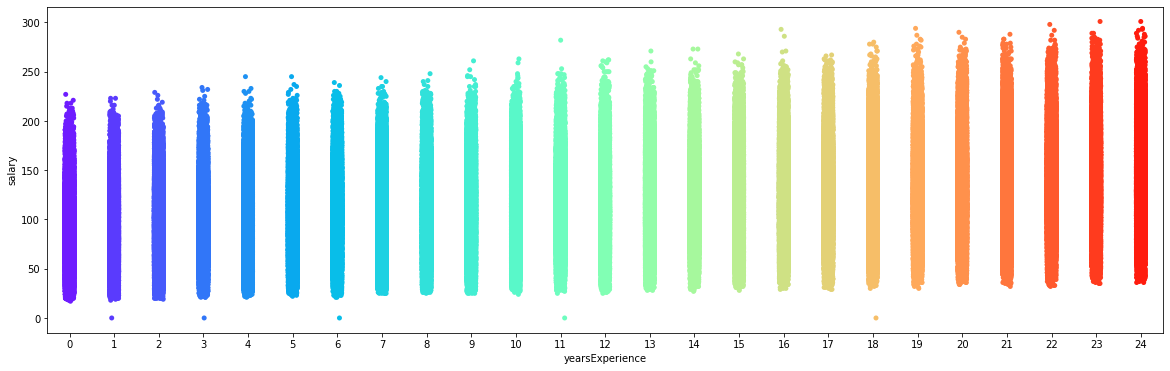

In [ ]:
# strip plot between yearsExperience and salary columns






from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

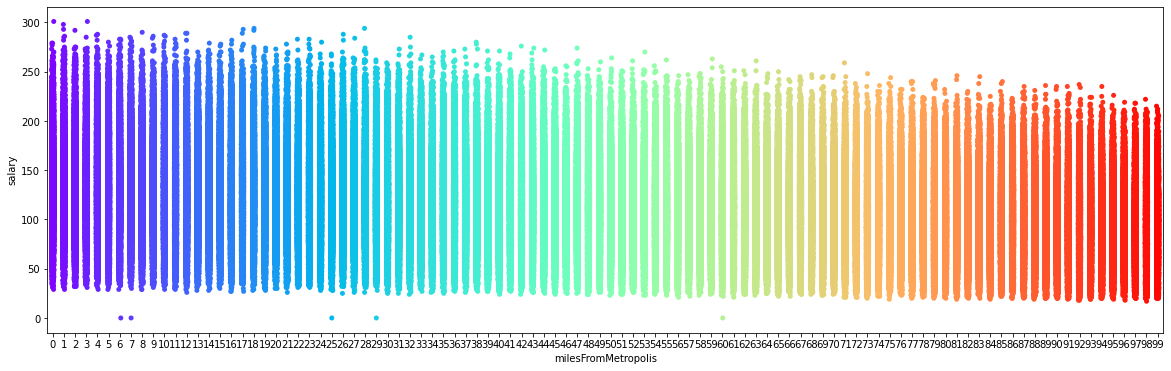

In [ ]:
# strip plot between milesFromMetropolis and salary columns









from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif 






In [ ]:
# creating a dataframe of just numerical values
train_for_vif = 



# target values
target = 


# numerical values column names
names = 






['yearsExperience', 'milesFromMetropolis']

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = 
  
  # taking all other remaining columns as fetaure variable
  x = 
  
  # firting the OLS model on y and x
  model =
  
  results = 
  
  # geting the r^2 value of results.
  rsq =
  
  # calculating vif value
  vif = 
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21 

R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [ ]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = 
  
  groups = 
  
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors =
  
  for major in unique_majors:
    # call stats.probplot and plot
      
      


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = 
  
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table =
  

  # calculate SSTR and update anova table
  x_bar = 
  SSTR = 
  anova_table['SS']['Between Groups'] = 

  # calculate SSE and update anova table
  SSE = 
  anova_table['SS']['Within Groups'] = 

  # calculate SSTR and update anova table
  SSTR = 
  anova_table['SS']['Total'] = 

  # update degree of freedom
  anova_table['df']['Between Groups'] = 
  anova_table['df']['Within Groups'] = 
  anova_table['df']['Total'] = 

  # calculate MS
  anova_table['MS'] = 

  # calculate F 
  F = 
  anova_table['F']['Between Groups'] = 

  # p-value
  anova_table['P-value']['Between Groups'] = 

  # F critical 
  alpha = 
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


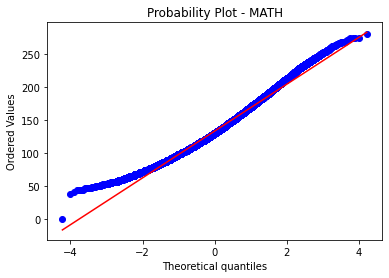

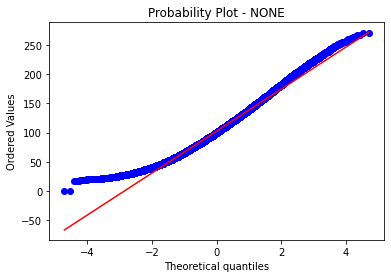

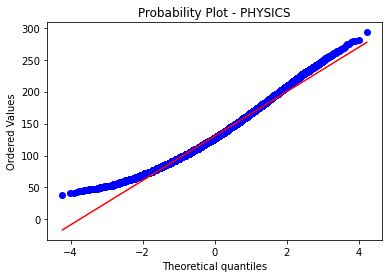

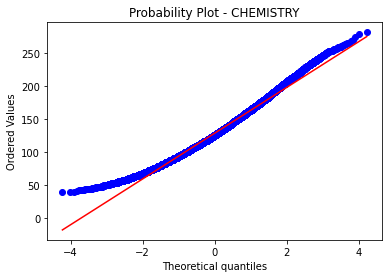

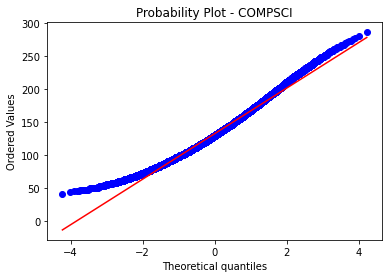

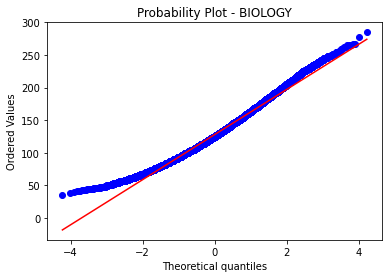

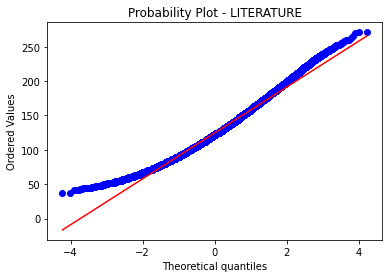

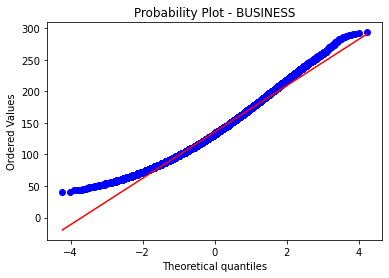

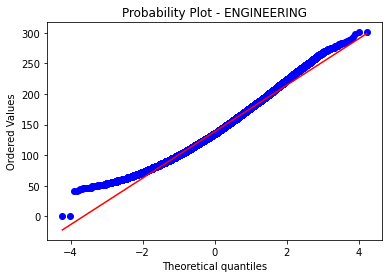

salary    1.137312
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        214940060.760225       8  26867507.595028  20922.428835   
Within Groups        1284137037.774666  999991      1284.148595                 
Total                1499077098.534891  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20922.428835180388  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [ ]:
# perform anova test on major and salary





          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125046
3         JANITOR  124971
4          JUNIOR  124594
5         MANAGER  125121
6          SENIOR  125886
7  VICE_PRESIDENT  125235


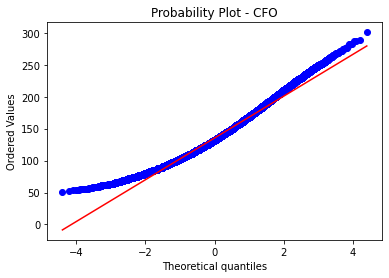

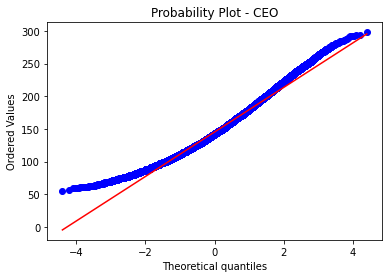

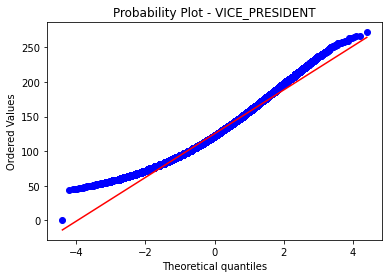

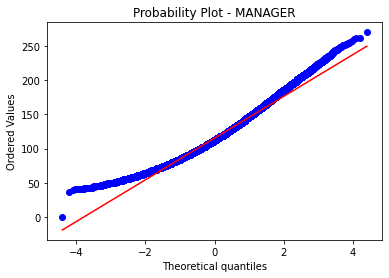

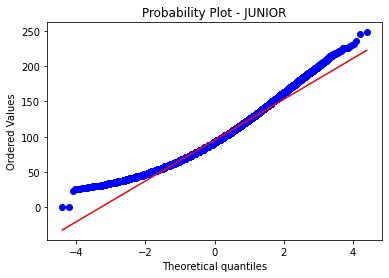

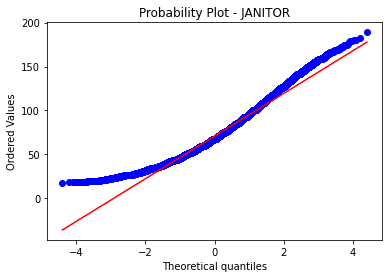

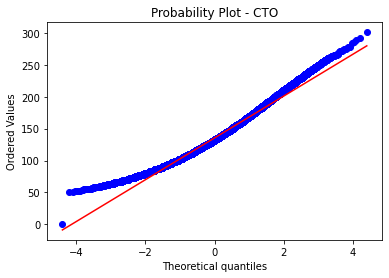

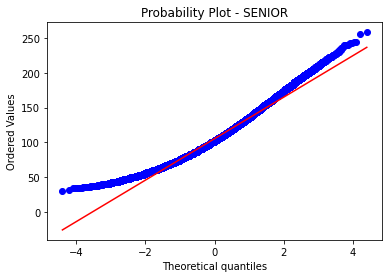

salary    1.3969
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
Between Groups        535091060.072659       7  76441580.01038  79296.758903   
Within Groups         963986038.462213  999992       963.99375                 
Total                1499077098.534871  999999     1499.078598                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 79296.75890294144  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 79296.75890294

In [ ]:
# perform anova test on jobType and salary




        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175364
2  HIGH_SCHOOL  236976
3      MASTERS  175311
4         NONE  236854


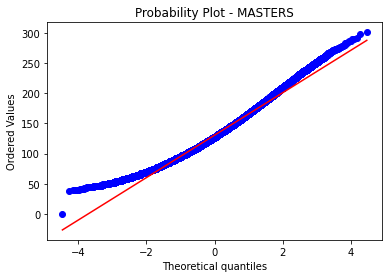

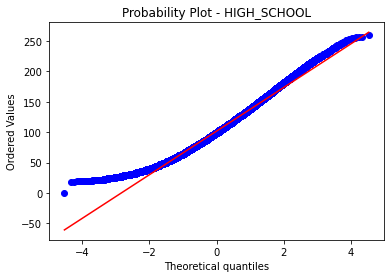

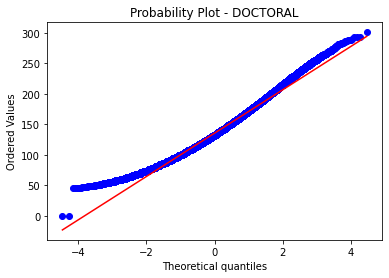

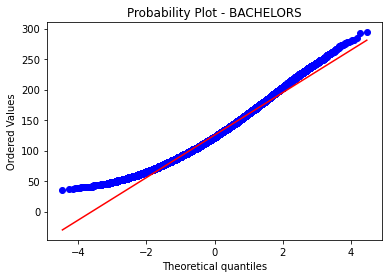

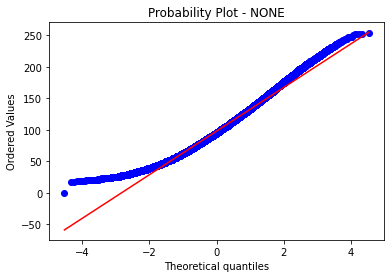

salary    1.034299
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        241396422.297586       4  60349105.574396  47984.202166   
Within Groups        1257680676.237301  999995      1257.686965                 
Total                1499077098.534887  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47984.20216602098  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [ ]:
# perform anova test on degree and salary





    industry  salary
0       AUTO  142943
1  EDUCATION  142819
2    FINANCE  142867
3     HEALTH  142755
4        OIL  142771
5    SERVICE  142639
6        WEB  143206


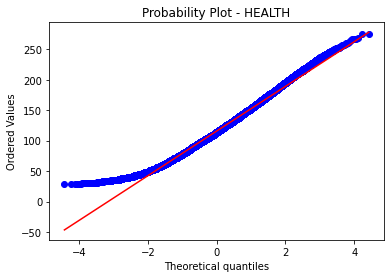

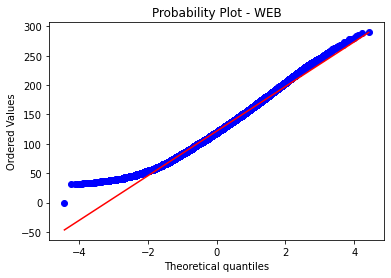

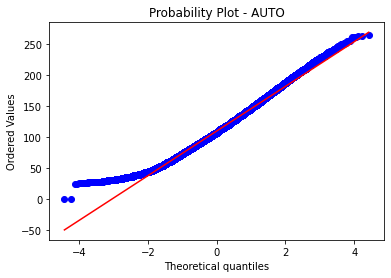

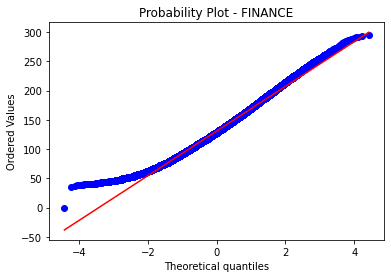

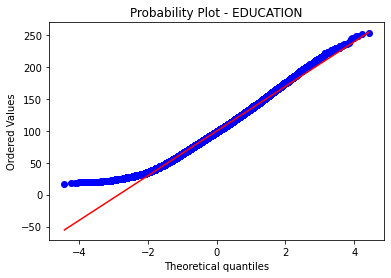

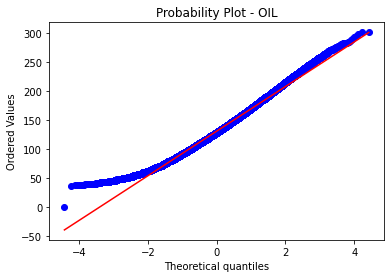

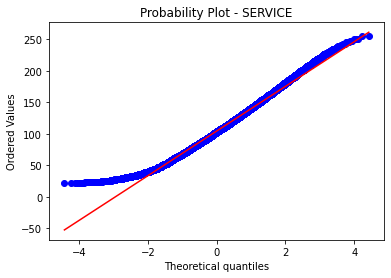

salary    1.0974
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
Between Groups        131887990.448761       6  21981331.74146  16077.642619   
Within Groups        1367189108.086116  999993     1367.198678                 
Total                1499077098.534877  999999     1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 16077.64261880987  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 16077.642

In [ ]:
# perform anova test on industry and salary





          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125046
3         JANITOR           124971
4          JUNIOR           124594
5         MANAGER           125121
6          SENIOR           125886
7  VICE_PRESIDENT           125235


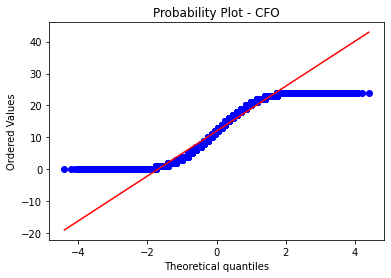

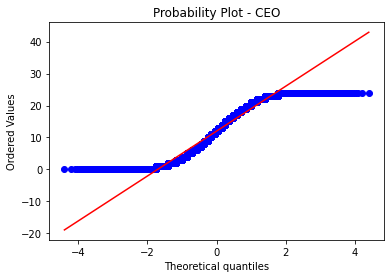

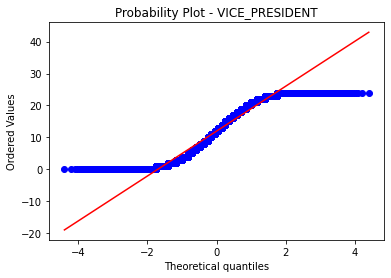

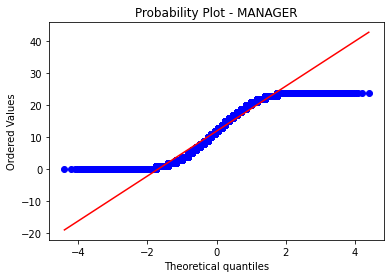

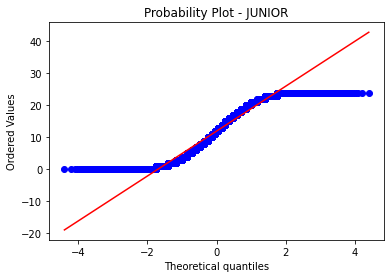

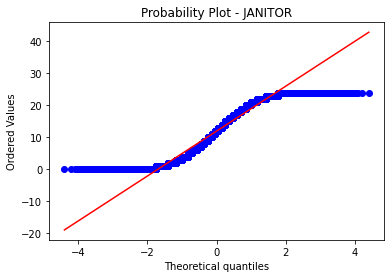

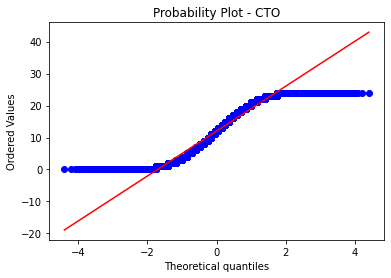

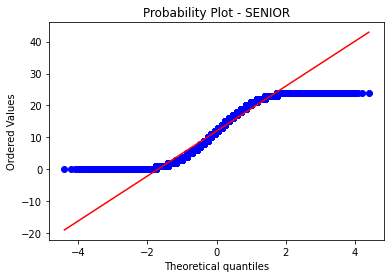

yearsExperience    1.002522
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            117.457034       7  16.779576  0.322567  0.944194   
Within Groups        52018412.569971  999992  52.018829                       
Total                52018530.027004  999999  52.018582                       

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.3225673597094048  and p value is: 0.9441941901986974
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.3225673597094048  and critical value is:

In [ ]:
# perform anova test on jobType and yearsExperience






        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175364
2  HIGH_SCHOOL           236976
3      MASTERS           175311
4         NONE           236854


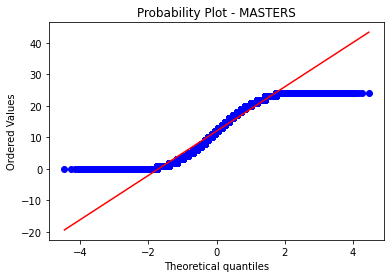

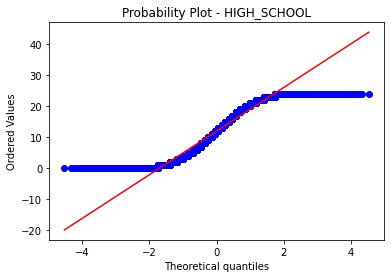

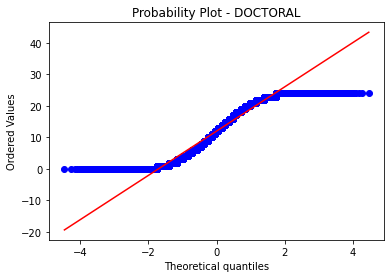

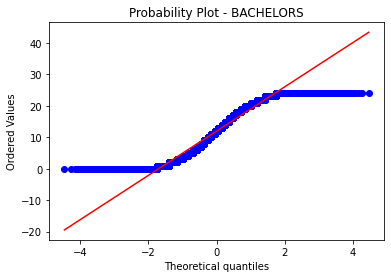

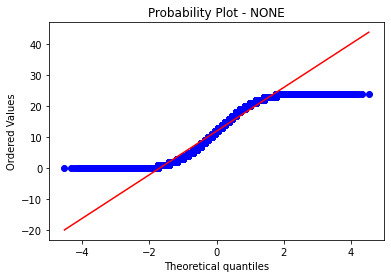

yearsExperience    1.002005
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups             40.221125       4  10.055281  0.193301  0.942004   
Within Groups         52018489.80588  999995   52.01875                       
Total                52018530.027004  999999  52.018582                       

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.19330109231773057  and p value is: 0.9420038025970138
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.19330109231773057  and critical va

In [ ]:
# perform anova test on degree and yearsExperience






         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58596
5   LITERATURE            58684
6         MATH            57801
7         NONE           532355
8      PHYSICS            58410


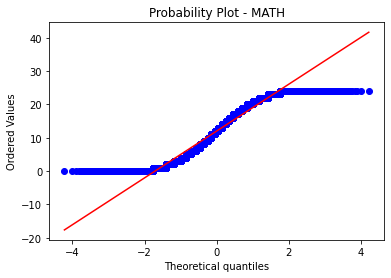

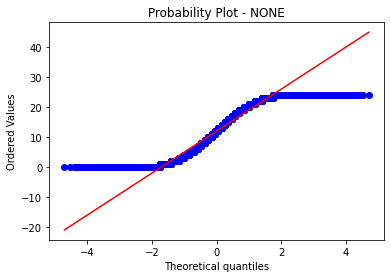

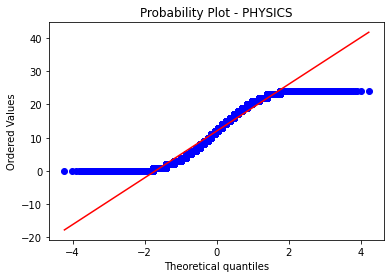

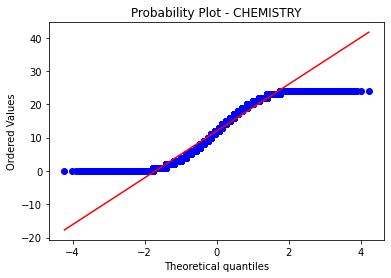

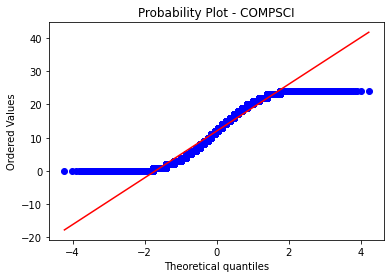

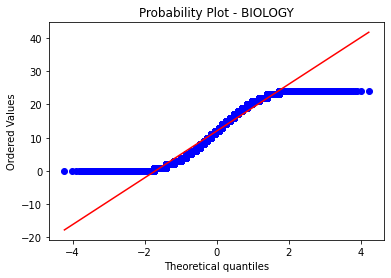

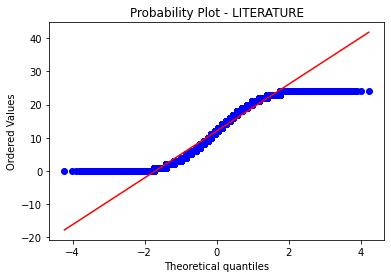

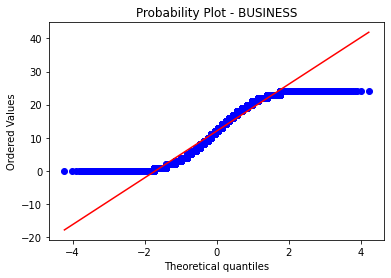

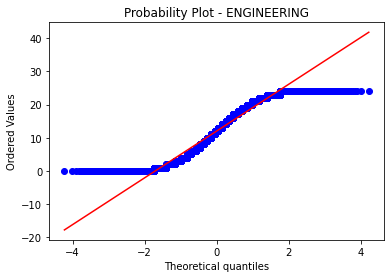

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups             73.972363       8   9.246545  0.177753  0.993928   
Within Groups        52018456.054641  999991  52.018924                       
Total                52018530.027005  999999  52.018582                       

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.17775349187267195  and p value is: 0.9939281417130893
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.17775349187267195  and critical va

In [ ]:
# perform anova test on major and yearsExperience






    industry  yearsExperience
0       AUTO           142943
1  EDUCATION           142819
2    FINANCE           142867
3     HEALTH           142755
4        OIL           142771
5    SERVICE           142639
6        WEB           143206


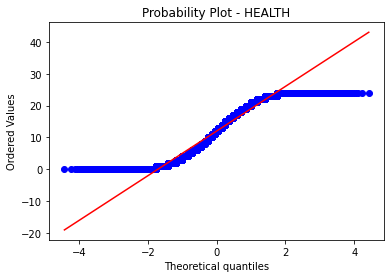

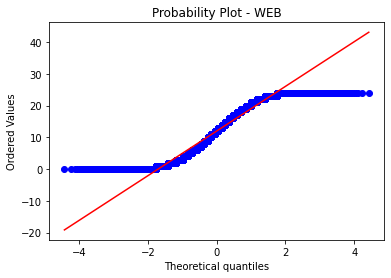

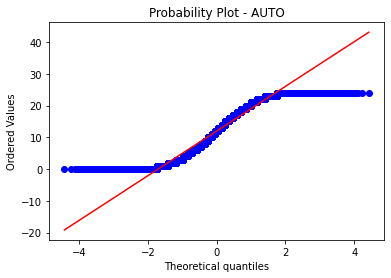

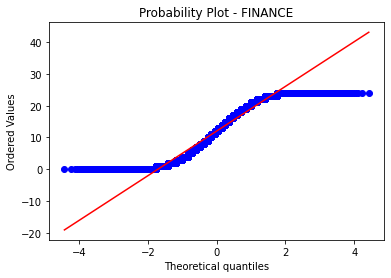

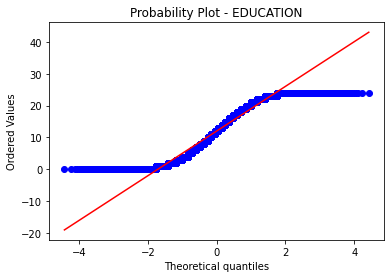

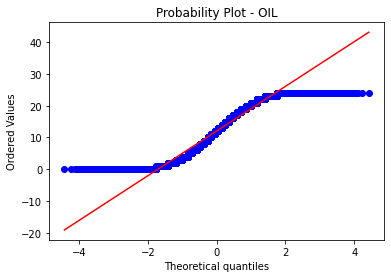

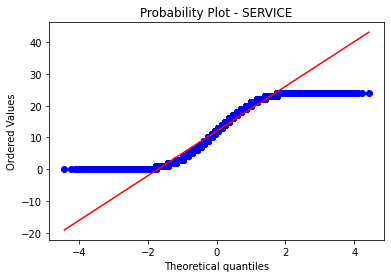

yearsExperience    1.002384
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            182.340098       6  30.390016  0.584213  0.743267   
Within Groups        52018347.686906  999993  52.018712                       
Total                52018530.027004  999999  52.018582                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.5842131652958172  and p value is: 0.7432671010723688
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.5842131652958172  and critical valu

In [ ]:
# perform anova test on industry and yearsExperience






## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

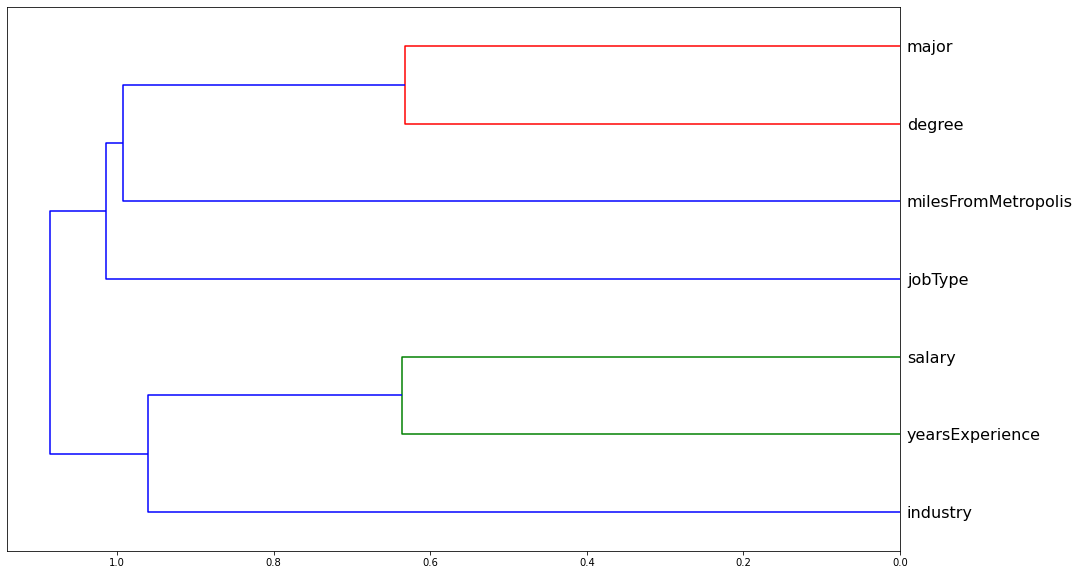

In [ ]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = 

import scipy
from scipy.cluster import hierarchy as hc

corr = 
corr_condensed = 
z = 
fig = 
dendrogram = 
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = 

  df[col] = 
  return df

In [ ]:
# Making a list of the column names to be scaled 
col_train =

# passing data and name for scaling
train_data = 

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = 
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = 
        new_columns = 
        d_out = 
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = 
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Split the labels and the target
train_X = 
train_Y = 

In [ ]:
# Features



jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [ ]:
# Target




0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
# passing features dataframe for one hot encoding process
encoder = 
train_X = 
train_X =
train_X = 





jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    



# Function for calculating all the relevant metrics 
def print_score(m):
    res = 
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = 

    _df = 
    _df['feature_importance'] = 
    _df['column'] = 
    feature_importance_df = 
    


    # grouping all data and sorting in descending order
    order = 
    
    
    # ploting feature importance data using boxenplot
    fig, ax =
    
    
    
    return fig, ax


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.599662460642207
RMSE-Test: 19.640776244629414
Score-Train: 0.7433619794636954
Score-Test: 0.7441897549611014
MedAE-Train: 13.72265625
MedAE-Test: 13.75390625
MeanAE-Train: 15.836229741210937
MeanAE-Test: 15.873639750976562 

CPU times: user 2.01 s, sys: 465 ms, total: 2.47 s
Wall time: 1.57 s


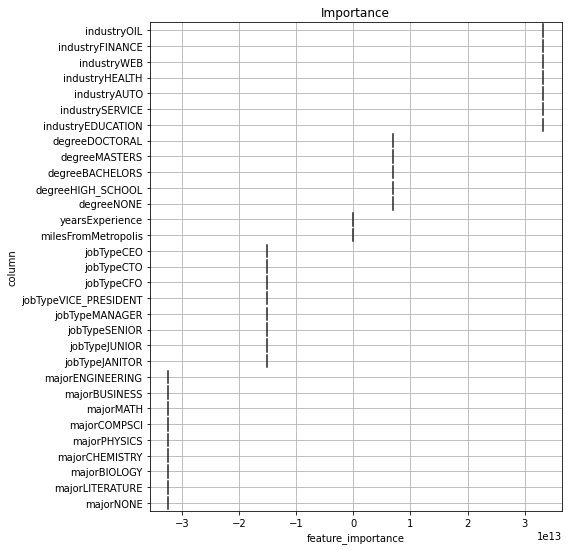

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor



# Instantiate the model
lModel =

# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 19.985481538322734
RMSE-Test: 20.597240814556198
Score-Train: 0.7331587009808858
Score-Test: 0.7186682608796628
MedAE-Train: 13.040000000000006
MedAE-Test: 13.932916666666664
MeanAE-Train: 15.775018144174325
MeanAE-Test: 16.4604713193254 

CPU times: user 2min 21s, sys: 480 ms, total: 2min 21s
Wall time: 2min 21s


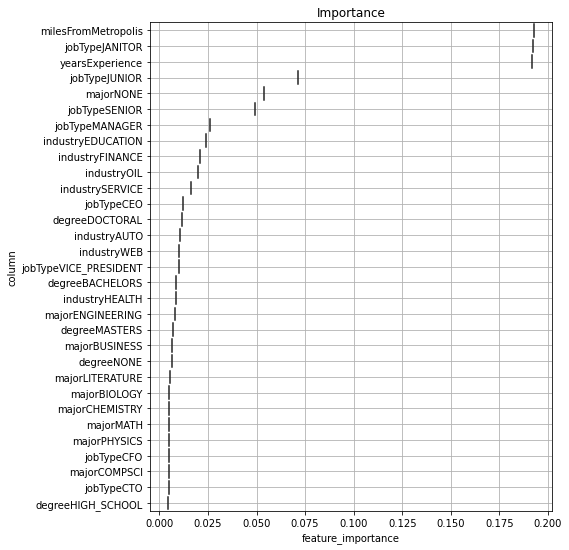

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor



# Instantiate the model
rf= 

# Fit the model to the data


# print score of the model



# visualizing the inportance of features.
fig, ax = 

### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor


# Instantiate the model
knnr = 

# print score of the model




# print score of the model





RMSE-Train: 23.862212263325766
RMSE-Test: 24.040436701524253
Score-Train: 0.6195958713704387
Score-Test: 0.6167471945214295
MedAE-Train: 15.0
MedAE-Test: 15.200000000000003
MeanAE-Train: 18.569602
MeanAE-Test: 18.714945999999998 

CPU times: user 15min 11s, sys: 39.4 s, total: 15min 51s
Wall time: 13min 32s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.392801371989357
RMSE-Test: 19.454864170755112
Score-Train: 0.7487506706581463
Score-Test: 0.7490096387231541
MedAE-Train: 13.603374787483403
MedAE-Test: 13.642549864112638
MeanAE-Train: 15.665427612963102
MeanAE-Test: 15.71060536730414 

CPU times: user 13.6 s, sys: 112 ms, total: 13.7 s
Wall time: 13.6 s


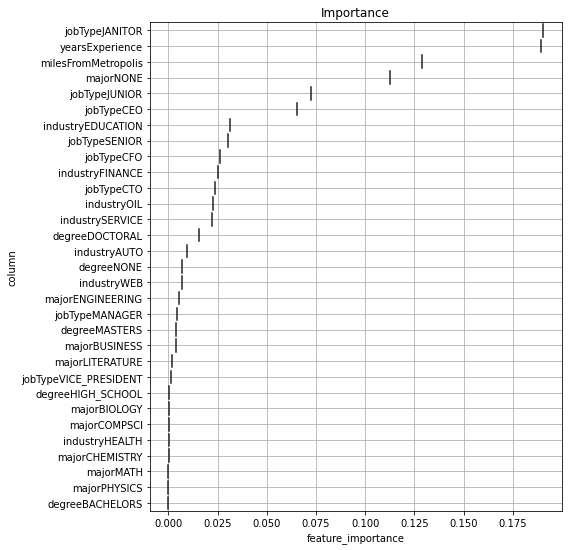

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor



# Instantiate the model
GBR = 





# print score of the model



# visualizing the inportance of features.
fig, ax =



### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor



# Instantiate the model
DTR = 


# Instantiate the model



# print score of the model




RMSE-Train: 19.392801371989357
RMSE-Test: 19.454864170755112
Score-Train: 0.7487506706581463
Score-Test: 0.7490096387231541
MedAE-Train: 13.603374787483403
MedAE-Test: 13.642549864112638
MeanAE-Train: 15.665427612963102
MeanAE-Test: 15.71060536730414 

CPU times: user 9.47 s, sys: 92.5 ms, total: 9.56 s
Wall time: 9.5 s


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.286808601851767
RMSE-Test: 25.299184686422233
Score-Train: 0.5728190715496321
Score-Test: 0.5755625578938093
MedAE-Train: 19.311869111709285
MedAE-Test: 19.288490498386523
MeanAE-Train: 21.048185735376077
MeanAE-Test: 21.0628739686568 

CPU times: user 31.9 s, sys: 2.4 s, total: 34.3 s
Wall time: 34.2 s


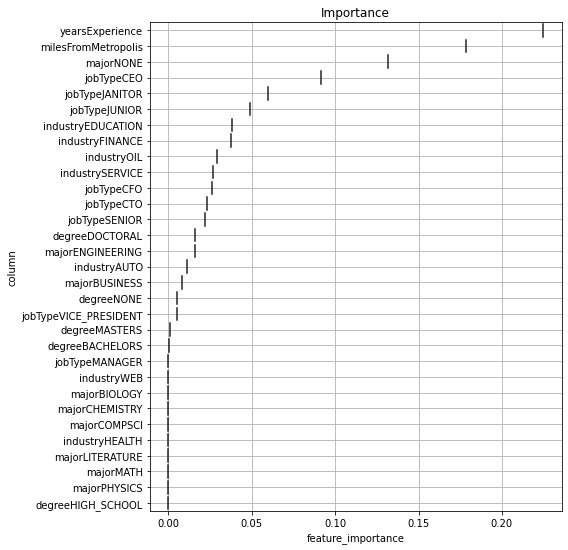

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor



# Instantiate the model
AdaBoost = 


# Instantiate the model



# print score of the model



# visualizing the inportance of features.
fig, ax = 


# visualizing the importance of features.


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[08:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 19.386429798684436
RMSE-Test: 19.44659439063452
Score-Train: 0.7489157412437386
Score-Test: 0.7492229729240143
MedAE-Train: 13.6046142578125
MedAE-Test: 13.636852264404297
MeanAE-Train: 15.661278373212815
MeanAE-Test: 15.709708502206801 

CPU times: user 16.1 s, sys: 277 ms, total: 16.4 s
Wall time: 16.6 s


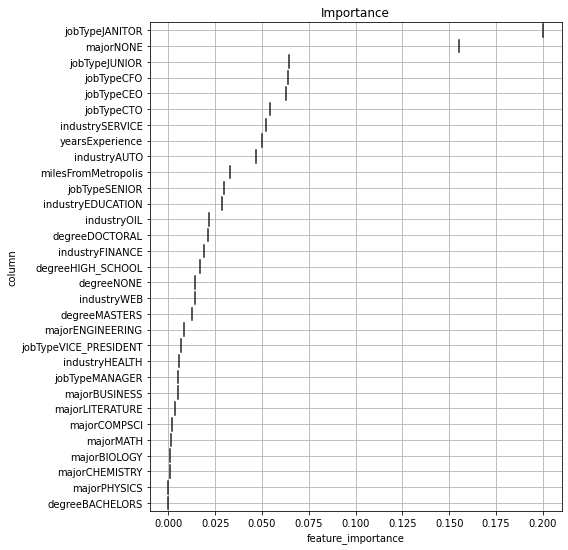

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor



# Instantiate the model
xgbr =


# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 



### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train: 19.016958165579524
RMSE-Test: 19.0908874381103
Score-Train: 0.7583950016177559
Score-Test: 0.7583132333291471
MedAE-Train: 13.395891514019603
MedAE-Test: 13.47257494424872
MeanAE-Train: 15.41236813712935
MeanAE-Test: 15.47641312457152 

CPU times: user 29.6 s, sys: 133 ms, total: 29.8 s
Wall time: 29.8 s


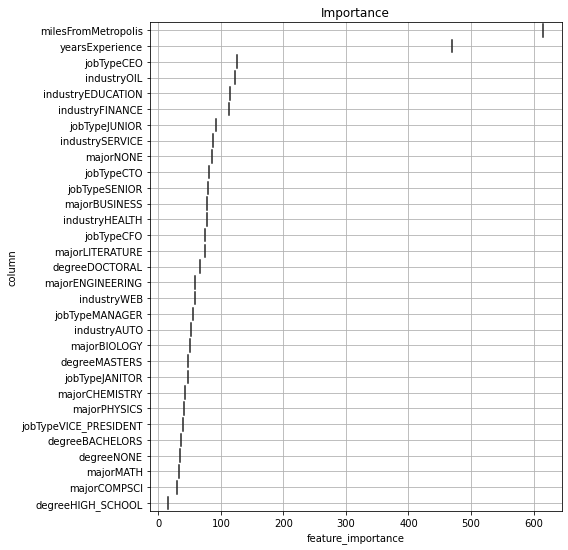

In [ ]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm



# Instantiate the model
lg =


# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 


### Comparing all the model based on metric

In [ ]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects 
    data = 
    
    df_train =
    
    df_test = 
    

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= 
      
       # then predict on the test set
      res = 
      
      df_train[name] = 
      
      df_test[name] = 
      
    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models=

names = 

comp_model_train,comp_model_test = 


#### RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test





  Metric         Lr      Dtree     Forest        Knn        GBR    Xboost  \
0   rmse  19.599662  26.835603  19.985482  23.862212  19.392801  19.38643   

    AdaBoost  
0  25.286809  


  Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.640776  27.751421  20.597241  24.040437  19.454864  19.446594   

    AdaBoost  
0  25.299185  


#### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test





Results on Test data


Metric         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  19.640776  27.751421  20.597241  24.040437  19.454864   
1      MedAE  13.753906  17.000000  13.932917  15.200000  13.642550   
2        MAE  15.873640  21.619402  16.460471  18.714946  15.710605   
3  R-squared   0.653956   0.498838   0.641226   0.428721   0.619109   

      Xboost   AdaBoost  
0  19.446594  25.299185  
1  13.636852  19.288490  
2  15.709709  21.062874  
3   0.619704   0.167006

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = 
  # Fit the random search model
  
  
  print(random.best_params_)

In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv





Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [ ]:
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv






Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5.0}


In [ ]:
# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv





Fitting 3 folds for each of 20 candidates, totalling 60 fits
[09:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 29.978815355491296
RMSE-Test: 30.060886216489372
Score-Train: 0.3995833222728987
Score-Test: 0.4007553061257786
MedAE-Train: 20.57174474363704
MedAE-Test: 20.57174474363704
MeanAE-Train: 24.03023302232483
MeanAE-Test: 24.08800047983589 

CPU times: user 16.7 s, sys: 270 ms, total: 16.9 s
Wall time: 18 s


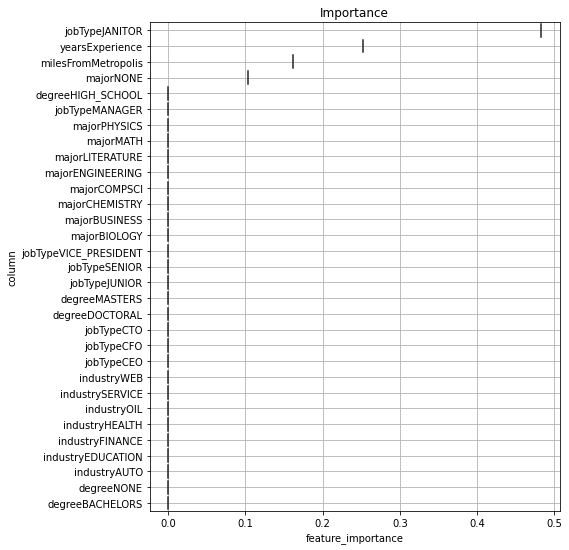

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= 


# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 


### Gradient Boosting Regressor

RMSE-Train: 19.155794312005085
RMSE-Test: 19.225005544656423
Score-Train: 0.7548543773672098
Score-Test: 0.7549054890076567
MedAE-Train: 13.443810114235
MedAE-Test: 13.49578479593696
MeanAE-Train: 15.512461962509649
MeanAE-Test: 15.576381633532284 

CPU times: user 18.1 s, sys: 136 ms, total: 18.2 s
Wall time: 18.5 s


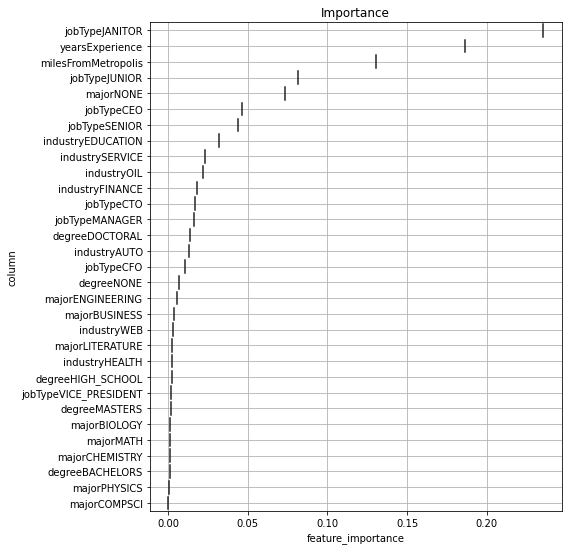

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR =





# print score of the model



# visualizing the inportance of features.
fig, ax = 

### Decision Tree Regrsessor

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = 

# Instantiate the model



# print score of the model



RMSE-Train: 19.155794312005085
RMSE-Test: 19.225005544656423
Score-Train: 0.7548543773672098
Score-Test: 0.7549054890076567
MedAE-Train: 13.443810114235
MedAE-Test: 13.49578479593696
MeanAE-Train: 15.512461962509649
MeanAE-Test: 15.576381633532284 

CPU times: user 11.1 s, sys: 128 ms, total: 11.2 s
Wall time: 11.4 s


### XGBoost Regressor

[09:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 19.02070168239728
RMSE-Test: 19.08113885996094
Score-Train: 0.7582998716410514
Score-Test: 0.7585600003566466
MedAE-Train: 13.391258239746094
MedAE-Test: 13.460548400878906
MeanAE-Train: 15.415495951049328
MeanAE-Test: 15.474418513536452 

CPU times: user 26.8 s, sys: 368 ms, total: 27.2 s
Wall time: 27.7 s


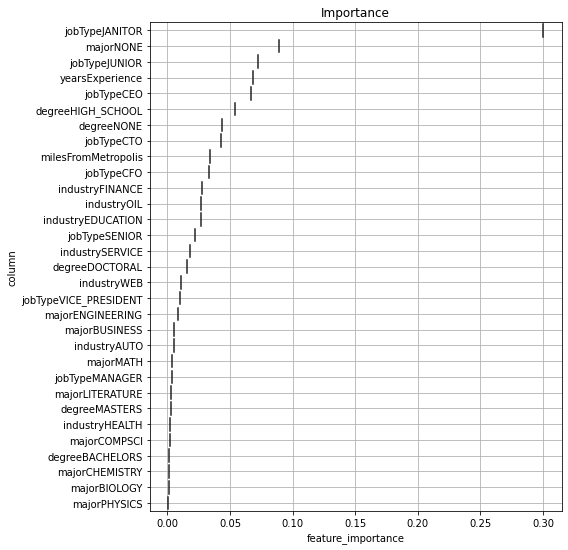

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr =

# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 


## Comparing the metrics for tuned models

In [ ]:
models=

names =
comp_model_train,comp_model_test = 


In [ ]:
print("Metrics on train data")




Metrics on train data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.779291  29.978815  19.155794  19.020702
1      MedAE  24.381523  20.571745  13.443810  13.391258
2        MAE  27.995538  24.030233  15.512462  15.415496
3  R-squared  -3.213736  -0.504502   0.683501   0.679764

In [ ]:
print("Metrics on test data")




Metrics on test data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.779291  29.978815  19.155794  19.020702
1      MedAE  24.381523  20.571745  13.443810  13.391258
2        MAE  27.995538  24.030233  15.512462  15.415496
3  R-squared  -3.213736  -0.504502   0.683501   0.679764

### Now working with the test dataset provided

In [ ]:
# test data 
test_X = 



In [ ]:
# passing test data for scaling
col_test = 

test_X = 


In [ ]:
# passing test dataset for one hot encoding process
encoder = 

test_drop =

test_X = 
test_X = 
test_X = 




jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [ ]:
# Perforn the prediction on the test dataset
y_predicted =




array([112.89986376,  92.8730069 , 180.04599928, ...,  52.69870116,
       161.61580194, 119.81238273])

In [ ]:
# creating a dataframe of predicted results 
predictions = 


In [ ]:
# predicted values in dataframe



0
0       112.899864
1        92.873007
2       180.045999
3       103.820357
4       114.806537
...            ...
999995  169.624924
999996  110.883389
999997   52.698701
999998  161.615802
999999  119.812383

[1000000 rows x 1 columns]

### Conclusion
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.